# Lab01: Parametric Methods
## Mehmet Gönen
### October 5, 2021

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Parameters

In [2]:
np.random.seed(421)
# mean parameters
class_means = np.array([-3.0, -1.0, 3.0])
# standard deviation parameters
class_deviations = np.array([1.2, 1.0, 1.3])
# sample sizes
class_sizes = np.array([40, 30, 50])

## Data Generation

In [3]:
# generate random samples
points1 = np.random.normal(class_means[0], class_deviations[0], class_sizes[0])
points2 = np.random.normal(class_means[1], class_deviations[1], class_sizes[1])
points3 = np.random.normal(class_means[2], class_deviations[2], class_sizes[2])
points = np.concatenate((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

## Exporting Data

In [4]:
# write data to a file
np.savetxt("lab01_data_set.csv", np.stack((points, y), axis = 1), fmt = "%f,%d")

## Plotting Data

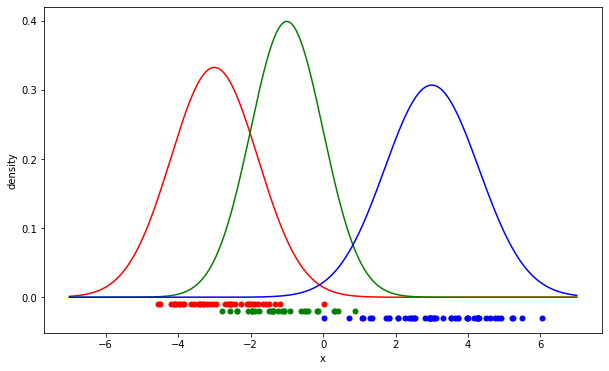

In [5]:
data_interval = np.linspace(-7, +7, 1401)
density1 = stats.norm.pdf(data_interval, loc = class_means[0], scale = class_deviations[0])
density2 = stats.norm.pdf(data_interval, loc = class_means[1], scale = class_deviations[1])
density3 = stats.norm.pdf(data_interval, loc = class_means[2], scale = class_deviations[2])

plt.figure(figsize = (10, 6))
# plot data points of the first class
plt.plot(points1, np.repeat(-0.01, class_sizes[0]), "r.", markersize = 10)
# plot density of the first class
plt.plot(data_interval, density1, "r")
# plot data points of the second class
plt.plot(points2, np.repeat(-0.02, class_sizes[1]), "g.", markersize = 10)
# plot density of the second class
plt.plot(data_interval, density2, "g")
# plot data points of the third class
plt.plot(points3, np.repeat(-0.03, class_sizes[2]), "b.", markersize = 10)
# plot density of the third class
plt.plot(data_interval, density3, "b")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

## Importing Data

In [6]:
# read data into memory
data_set = np.genfromtxt("lab01_data_set.csv", delimiter = ",")

# get x and y values
x = data_set[:,0]
y = data_set[:,1].astype(int)

# get number of classes and number of samples
K = np.max(y)
N = data_set.shape[0]

## Parameter Estimation

$\widehat{\mu_{c}} = \dfrac{\sum\limits_{i = 1}^{N} x_{i} \mathbb{1}(y_{i} = c)}{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}$

In [7]:
# calculate sample means
sample_means = [np.mean(x[y == (c + 1)]) for c in range(K)]

$\widehat{\sigma_{c}^{2}} = \dfrac{\sum\limits_{i = 1}^{N} (x_{i} - \widehat{\mu_{c}})^{2} \mathbb{1}(y_{i} = c)}{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}$

In [8]:
# calculate sample deviations
sample_deviations = [np.sqrt(np.mean((x[y == (c + 1)] - sample_means[c])**2)) for c in range(K)]

$\widehat{P}(y_{i} = c) = \dfrac{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}{N}$

In [9]:
# calculate prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]

## Parametric Classification

In [10]:
data_interval = np.linspace(-7, +7, 1401)

\begin{align*}
g_{c}(x) &= \log p(x | y = c) + \log P(y = c)\\
&= -\dfrac{1}{2} \log(2 \pi \sigma_{c}^{2}) - \dfrac{(x - \mu_{c})^{2}}{2 \sigma_{c}^{2}} + \log P(y = c)
\end{align*}

In [11]:
# evaluate score functions
score_values = np.stack([- 0.5 * np.log(2 * math.pi * sample_deviations[c]**2) 
                         - 0.5 * (data_interval - sample_means[c])**2 / sample_deviations[c]**2 
                         + np.log(class_priors[c])
                         for c in range(K)])

\begin{align*}
\log P(y = c | x) &= \log p(x | y = c) + \log P(y = c) - \log p(x)\\
\log p(x) &= \log\left(\sum \limits_{c = 1}^{K} p(x | y = c) P(y = c)\right)
\end{align*}

We used the following property to calculate $\log p(x)$:

$\log\left(\sum\limits_{i = 1}^{N} \exp(x_{i})\right) = m + \log\left(\sum\limits_{i = 1}^{N} \exp(x_{i} - m)\right)$

where $m = \max(x_{1}, x_{2}, \dots, x_{N})$.

In [12]:
# calculate log posteriors
log_posteriors = score_values - [np.max(score_values[:, r]) + 
                                 np.log(np.sum(np.exp(score_values[:, r] - np.max(score_values[:, r]))))
                                 for r in range(score_values.shape[1])]

## Score Functions

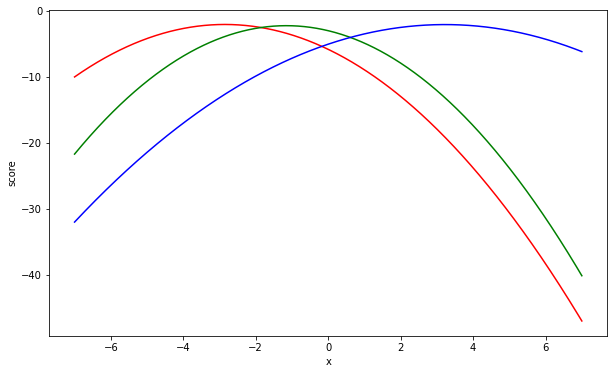

In [13]:
plt.figure(figsize = (10, 6))
# plot score function of the first class
plt.plot(data_interval, score_values[0,:], "r")
# plot score function of the second class
plt.plot(data_interval, score_values[1,:], "g")
# plot score function of the third class
plt.plot(data_interval, score_values[2,:], "b")
plt.xlabel("x")
plt.ylabel("score")
plt.show()

## Posteriors

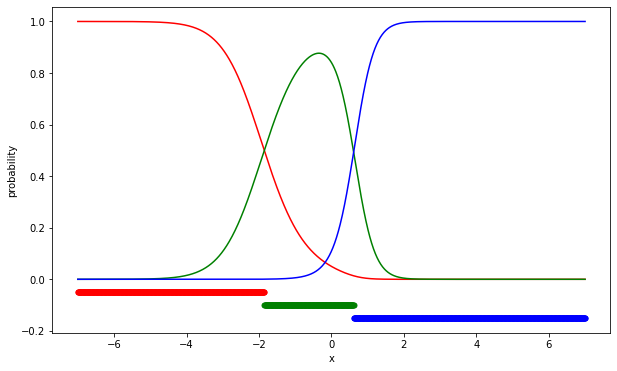

In [14]:
plt.figure(figsize = (10, 6))
# plot posterior probability of the first class
plt.plot(data_interval, np.exp(log_posteriors[0,:]), "r")
# plot posterior probability of the second class
plt.plot(data_interval, np.exp(log_posteriors[1,:]), "g")
# plot posterior probability of the third class
plt.plot(data_interval, np.exp(log_posteriors[2,:]), "b")

class_assignments = np.argmax(score_values, axis = 0)

#plot region where the first class has the highest probability
plt.plot(data_interval[class_assignments == 0], 
         np.repeat(-0.05, np.sum(class_assignments == 0)), "r.", markersize = 10)
#plot region where the second class has the highest probability
plt.plot(data_interval[class_assignments == 1], 
         np.repeat(-0.10, np.sum(class_assignments == 1)), "g.", markersize = 10)
#plot region where the third class has the highest probability
plt.plot(data_interval[class_assignments == 2], 
         np.repeat(-0.15, np.sum(class_assignments == 2)), "b.", markersize = 10)

plt.xlabel("x")
plt.ylabel("probability")

plt.show()